###Task 1: Data Understanding and Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


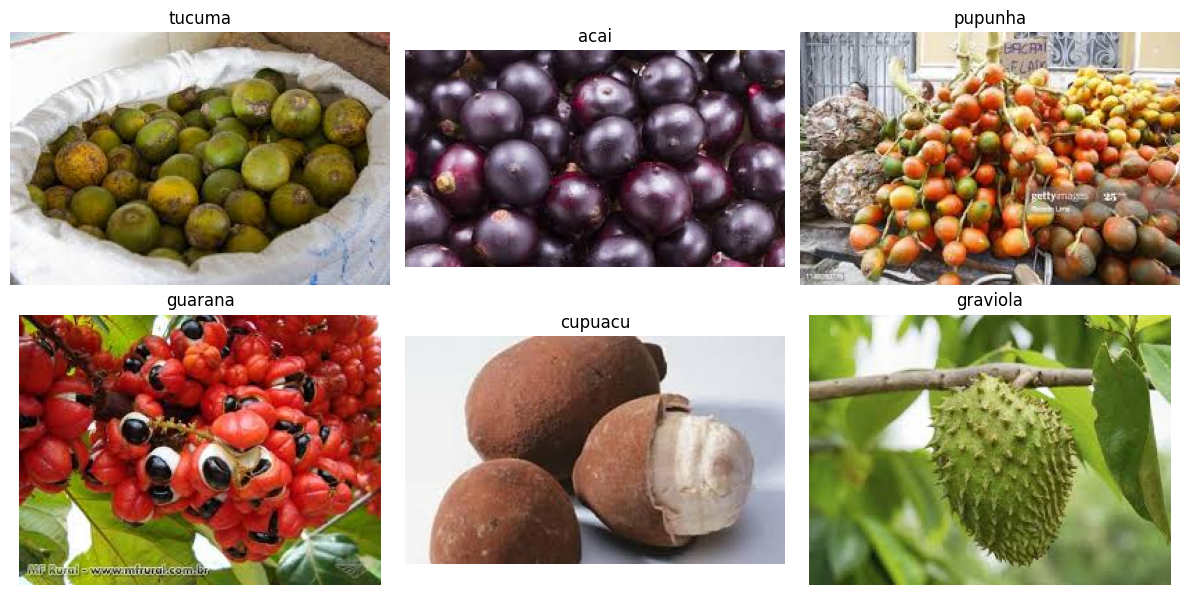

In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the train dataset
train_dir = "/content/drive/MyDrive/FruitinAmazon/train"

# Get the list of class directions
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []

for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(os.path.join(class_path, selected_image))
        labels.append(class_dir)

# Display images in a grid with two rows
num_images = len(selected_images)
cols = num_images // 2 + num_images % 2  # Ensure we have two rows
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten axes for easy iteration if necessary
axes = axes.flatten()

for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(labels[i])
    axes[i].axis('off')

# Hide any extra subplot spaces if class count is odd
for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


###Task 2: Loading and Preprocessing Image Data in keras

In [4]:
import tensorflow as tf

# Define the dataset
train_dir = "/content/drive/MyDrive/FruitinAmazon/train"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",  # Use folder names as labels
    label_mode="int",  # Encode labels as integers
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset="training",
    seed=123  # Ensures the same split each time
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    validation_split=validation_split,
    subset="validation",
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Display dataset structure
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


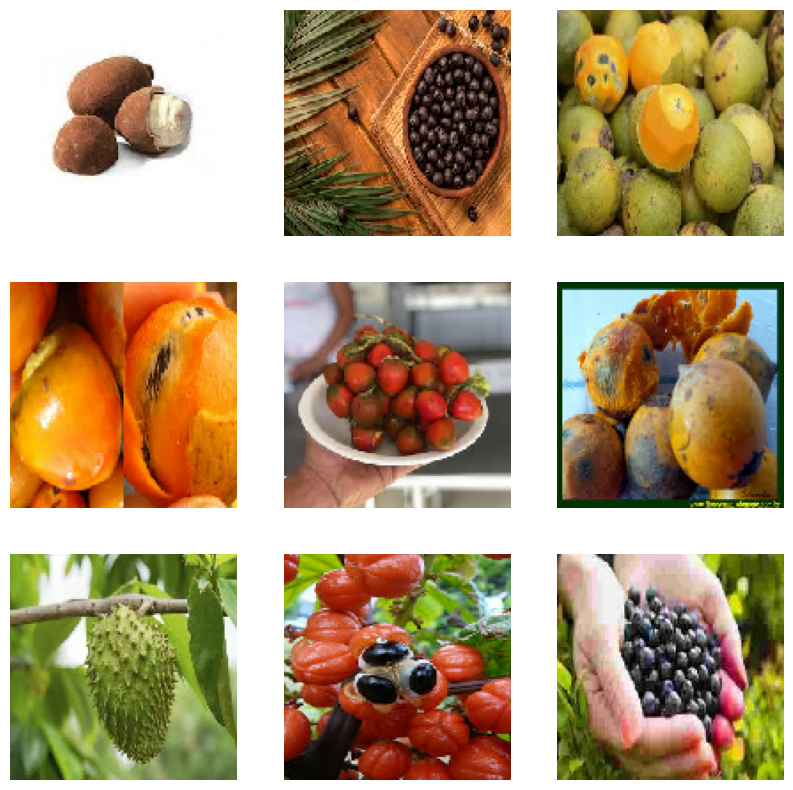

In [5]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_ds
image_batch, label_batch = next(iter(train_ds))

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)  # Indented properly
    plt.imshow(image_batch[i].numpy())  # Convert tensor to numpy
    plt.axis("off")  # Hide axis

plt.show()  # Show the images


###Task 3 - Implement a CNN

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn(input_shape, num_classes):
  model = models.Sequential()

  # Convolutional Layer 1
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))
  # Pooling Layer 1
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Convolutional Layer 2
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
  # Pooling Layer 2
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Flatten Layer
  model.add(layers.Flatten())

  # Fully Connected Layers
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))

  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model


# Change input_shape to match the image size used in the dataset
input_shape = (128, 128, 3)
num_classes = 10
model = build_cnn(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

###Task 4: Compile the Model

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




###Task 4: Train the Model

In [8]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',           # Save model as 'best_model.h5' when improved
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Save the best model (the one with lowest validation loss)
    verbose=1,                 # Show output when saving
    mode='min'                 # Minimize the validation loss
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss for early stopping
    patience=10,               # Stop training if no improvement for 10 epochs
    restore_best_weights=True, # Restore the weights of the best model
    verbose=1                  # Show output when stopping
)

# Step 2: Train the Model
history = model.fit(
    train_ds,                  # Training dataset
    epochs=250,                # Number of epochs
    batch_size=16,             # Batch size
    validation_data=val_ds,    # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=1                  # Show progress during training
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0648 - loss: 2.6265
Epoch 1: val_loss improved from inf to 2.19034, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.0660 - loss: 2.6765 - val_accuracy: 0.0000e+00 - val_loss: 2.1903
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.2043 - loss: 2.1283
Epoch 2: val_loss improved from 2.19034 to 2.18311, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 498ms/step - accuracy: 0.2088 - loss: 2.1154 - val_accuracy: 0.0000e+00 - val_loss: 2.1831
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.2448 - loss: 1.8835
Epoch 3: val_loss did not improve from 2.18311
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step - accuracy: 0.2461 - loss: 1.8788 - val_accuracy: 0.0000e+00 - val_loss: 2.3069
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.2407 - loss: 1.7882
Epoch 4: val_loss improved from 2.18311 to 2.11853, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 733ms/step - accuracy: 0.2361 - loss: 1.7844 - val_accuracy: 0.0000e+00 - val_loss: 2.1185
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.2888 - loss: 1.6271
Epoch 5: val_loss improved from 2.11853 to 1.75423, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 777ms/step - accuracy: 0.2964 - loss: 1.6205 - val_accuracy: 0.1667 - val_loss: 1.7542
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6453 - loss: 1.3663
Epoch 6: val_loss improved from 1.75423 to 1.23424, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.6437 - loss: 1.3727 - val_accuracy: 0.7222 - val_loss: 1.2342
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.6892 - loss: 1.2019
Epoch 7: val_loss did not improve from 1.23424
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.6940 - loss: 1.1986 - val_accuracy: 0.3333 - val_loss: 1.5316
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.7801 - loss: 1.0049
Epoch 8: val_loss improved from 1.23424 to 0.90773, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.7795 - loss: 1.0006 - val_accuracy: 0.7778 - val_loss: 0.9077
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.7951 - loss: 0.8063
Epoch 9: val_loss did not improve from 0.90773
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - accuracy: 0.7943 - loss: 0.8069 - val_accuracy: 0.5000 - val_loss: 1.1259
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.8142 - loss: 0.6551
Epoch 10: val_loss improved from 0.90773 to 0.70084, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 781ms/step - accuracy: 0.8190 - loss: 0.6591 - val_accuracy: 0.8333 - val_loss: 0.7008
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.8698 - loss: 0.5218
Epoch 11: val_loss did not improve from 0.70084
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step - accuracy: 0.8711 - loss: 0.5227 - val_accuracy: 0.5556 - val_loss: 1.1237
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8652 - loss: 0.5184
Epoch 12: val_loss improved from 0.70084 to 0.48344, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 0.8641 - loss: 0.5155 - val_accuracy: 0.8889 - val_loss: 0.4834
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9450 - loss: 0.3587
Epoch 13: val_loss did not improve from 0.48344
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.9449 - loss: 0.3594 - val_accuracy: 0.8333 - val_loss: 0.6106
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8895 - loss: 0.3871
Epoch 14: val_loss did not improve from 0.48344
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step - accuracy: 0.8928 - loss: 0.3810 - val_accuracy: 0.7778 - val_loss: 0.7492
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.9699 - loss: 0.2581
Epoch 15: val_loss did not improve from 0.48344
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - accuracy: 0.9705 - loss: 0.2549 - val_accuracy: 0.8333 - val_loss: 0.5094
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9497 - loss: 0.2250
Epoch 16: val_loss improved from 0.48344 to 0.42763,

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 782ms/step - accuracy: 0.9518 - loss: 0.2208 - val_accuracy: 0.8333 - val_loss: 0.4276
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.9902 - loss: 0.1421
Epoch 17: val_loss did not improve from 0.42763
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.9891 - loss: 0.1427 - val_accuracy: 0.8333 - val_loss: 0.6228
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9705 - loss: 0.1080
Epoch 18: val_loss did not improve from 0.42763
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.9674 - loss: 0.1149 - val_accuracy: 0.8333 - val_loss: 0.6224
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.9902 - loss: 0.0582
Epoch 19: val_loss did not improve from 0.42763
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.9891 - loss: 0.0606 - val_accuracy: 0.7222 - val_loss: 0.5692
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9705 - loss: 0.0752
Epoch 20: val_loss improved from 0.42763 to 0.34792,

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 761ms/step - accuracy: 0.9674 - loss: 0.0797 - val_accuracy: 0.8889 - val_loss: 0.3479
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 1.0000 - loss: 0.0242
Epoch 21: val_loss did not improve from 0.34792
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 1.0000 - loss: 0.0248 - val_accuracy: 0.7222 - val_loss: 1.2316
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9595 - loss: 0.1482
Epoch 22: val_loss did not improve from 0.34792
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.9627 - loss: 0.1422 - val_accuracy: 0.8333 - val_loss: 0.6518
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 1.0000 - loss: 0.0387
Epoch 23: val_loss did not improve from 0.34792
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 1.0000 - loss: 0.0389 - val_accuracy: 0.8889 - val_loss: 0.5654
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9902 - loss: 0.0448
Epoch 24: val_loss did not improve from 0.34792
3/3 

###Task 5: Evaluate the Model

In [9]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.8889 - loss: 0.3479
Validation Loss: 0.3479238748550415
Validation Accuracy: 0.8888888955116272


###Task 6: Save the Model

In [10]:
# Save the trained model to an .h5 file
model.save('/content/best_model.h5')
print("Model saved to /content/best_model.h5 ")

Model saved to /content/best_model.h5 


###Task 6: Load the Model

In [11]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/best_model.h5')
print("Model loaded successfully")

# Re-evaluate the model on the validation/test set
test_loss, test_accuracy = loaded_model.evaluate(val_ds)
print(f"Re-evaluated Test Loss: {test_loss}")
print(f"Re-evaluated Test Accuracy: {test_accuracy}")


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8889 - loss: 0.3479
Re-evaluated Test Loss: 0.3479238748550415
Re-evaluated Test Accuracy: 0.8888888955116272


###Task 7: Predictions and Classification Report

In [12]:
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report

# Check the class distribution in the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)
print(Counter(y_true))  # This will print the number of samples per class

# Get predictions on the validation dataset
y_pred = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Generate the Classification Report with zero_division to handle ill-defined metrics
report = classification_report(y_true, y_pred_labels, zero_division=0)
print(report)


Counter({np.int32(5): 15, np.int32(4): 3})
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.93      0.93      0.93        15

    accuracy                           0.89        18
   macro avg       0.64      0.53      0.58        18
weighted avg       0.94      0.89      0.91        18



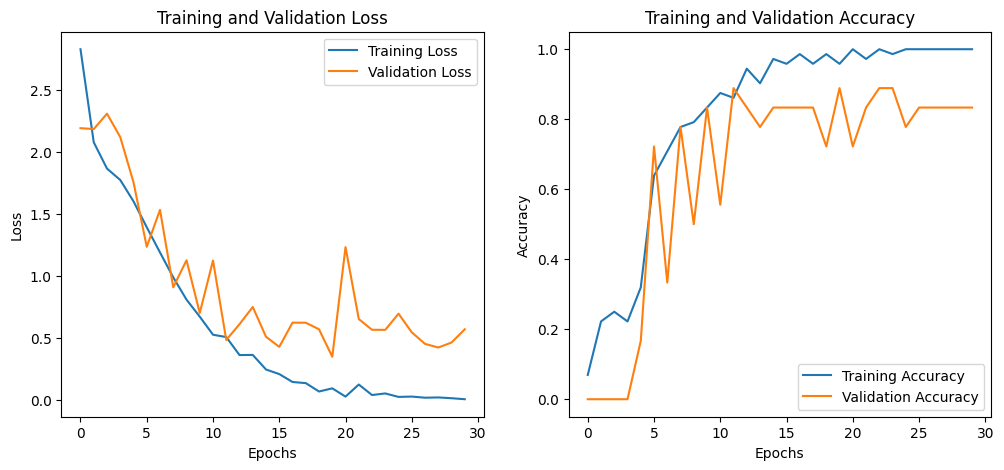

In [13]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing model training history
history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Training Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict["accuracy"], label="Training Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()